In [2]:
A = 7
V = 1.5
s = 0.02
k = 1
A1 = 2.694e11
A2 = 1.3e47
T1 = 70225/8.314
T2 = 283356/8.314
C = (0.9*4.14e6 + 0.1*4167460)
c = 3.58e3
m = 30
Bmax = 0.31*0.5
B0 = 0.005*0.5
Qb = 1e6
var('T', 't', 'B')

(T, t, B)

In [3]:
mu(T) = (A1*exp(-T1/T))/(1 + A2*exp(-T2/T))
Ta(t) = 0.5*(273 + 20 + 273 + 5) + 0.5*(20 - 5)*sin(2*pi*t/24)
dQc(T, t) = -(k*A/s) * (T - Ta(t))
dQb(T, B, t) = m*Qb*mu(T)*B*(1 - B/Bmax)
ts = srange(0, 750, 0.01)

In [4]:
dT = (dQc(T,t) + dQb(T,B,t))/(m*c)
dB = mu(T)*B*(1 - B/Bmax)

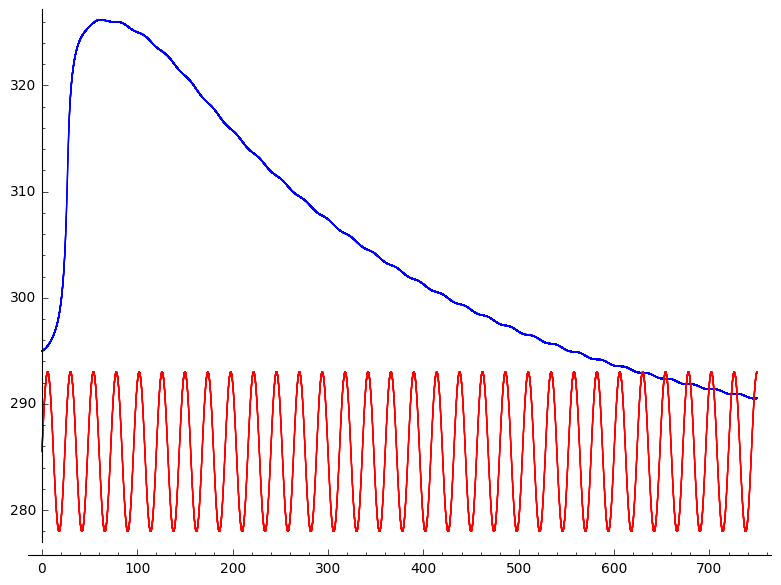

In [5]:
result = desolve_odeint([dT, dB], [295, B0], ts, [T,B], ivar=t)
Ts = result[:,0]
Bs = result[:,1]
list_plot(zip(ts,Ts), size = 1) + list_plot(zip(ts, map(Ta, ts)), size = 1, color = 'red')

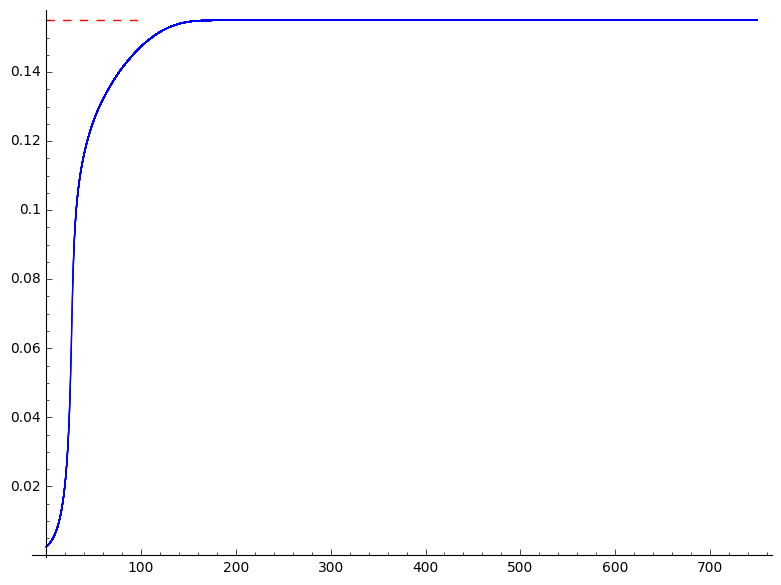

In [6]:
list_plot(zip(ts, Bs), size = 1) + plot(Bmax, xmin = 0, xmax = 100, color = 'red', linestyle = '--')

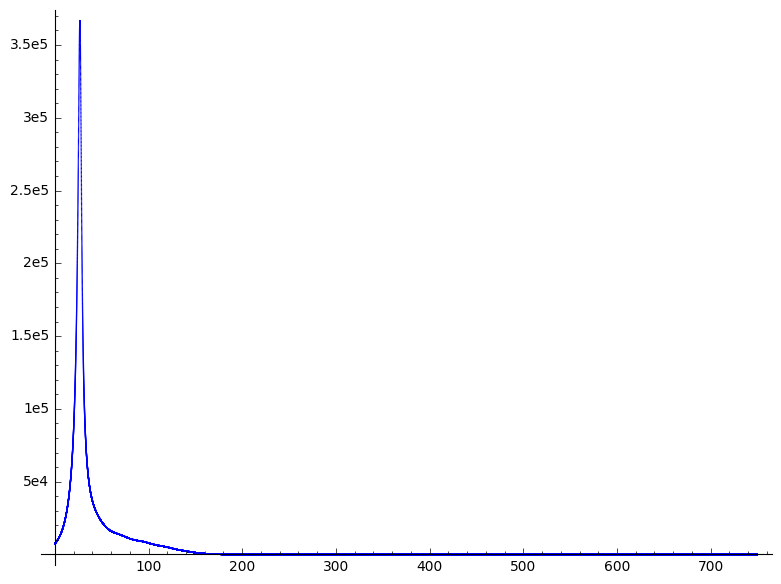

In [7]:
dQbs = map(lambda T, B, t: dQb(T, B, t), Ts, Bs, ts)
list_plot(zip(ts, dQbs), size = 1)